___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Quick Guide to Facebook's Prophet Basics
---
---

## IMPORTANT NOTE ONE:

**You should really read the papaer for Prophet! It is relatively straightforward and has a lot of insight on their techniques on how Prophet works internally!**

Link to paper: https://peerj.com/preprints/3190.pdf
---
---

## IMPORTANT NOTE TWO:

-----
------

* **NOTE: Link to installation instructions:** 
    * https://facebook.github.io/prophet/docs/installation.html#python 
    * SCROLL DOWN UNTIL YOU SEE THE ANACONDA OPTION AT THE BOTTOM OF THE PAGE.
    * YOU MAY NEED TO INSTALL BOTH **conda install gcc** and **conda install -c conda-forge fbprophet**
    * PLEASE READ THROUGH THE DOCS AND STACKOERFLOW CAREFULLY BEFORE POSTING INSTALLATION ISSUES TO THE QA FORUMS.

-----
----

In [1]:
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [2]:
df = pd.read_csv('../Data/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Format the Data

In [4]:
df.columns = ['ds','y']

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [6]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [7]:
future = m.make_future_dataframe(periods=24, freq = 'MS')

In [8]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [9]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [10]:
len(df)

324

In [11]:
len(future)

348


### Step 2: Predict and fill in the Future

In [12]:
forecast = m.predict(future)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1773.449803,1157.135391,1466.233152,1773.449803,1773.449803,-461.776706,-461.776706,-461.776706,-461.776706,-461.776706,-461.776706,0.0,0.0,0.0,1311.673097
1,1992-02-01,1776.239771,1187.356589,1488.206463,1776.239771,1776.239771,-427.591035,-427.591035,-427.591035,-427.591035,-427.591035,-427.591035,0.0,0.0,0.0,1348.648735
2,1992-03-01,1778.849740,1448.079811,1752.361124,1778.849740,1778.849740,-179.181320,-179.181320,-179.181320,-179.181320,-179.181320,-179.181320,0.0,0.0,0.0,1599.668420
3,1992-04-01,1781.639707,1425.623861,1737.019706,1781.639707,1781.639707,-196.311603,-196.311603,-196.311603,-196.311603,-196.311603,-196.311603,0.0,0.0,0.0,1585.328104
4,1992-05-01,1784.339676,1670.100165,1998.768328,1784.339676,1784.339676,45.026915,45.026915,45.026915,45.026915,45.026915,45.026915,0.0,0.0,0.0,1829.366590


In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5201.010945,5072.340313,5400.130489,5187.888250,5211.051101,40.218725,40.218725,40.218725,40.218725,40.218725,40.218725,0.0,0.0,0.0,5241.229670
344,2020-09-01,5217.085200,4919.046296,5247.642641,5202.725081,5227.879304,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,0.0,0.0,0.0,5084.201064
345,2020-10-01,5232.640931,5022.049118,5349.255822,5217.367928,5244.439457,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,0.0,0.0,0.0,5189.365538
346,2020-11-01,5248.715186,5178.692820,5495.243400,5232.441291,5261.560247,86.703091,86.703091,86.703091,86.703091,86.703091,86.703091,0.0,0.0,0.0,5335.418277
347,2020-12-01,5264.270916,6172.548173,6498.027156,5247.020770,5278.404885,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,0.0,0.0,0.0,6335.779667


In [15]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.788552,4466.890646,4790.644074
337,2020-02-01,4679.048478,4516.433820,4830.852703
338,2020-03-01,4942.495400,4785.617638,5107.616490
339,2020-04-01,4941.439371,4774.926377,5111.781573
340,2020-05-01,5198.333619,5023.105076,5354.293212
341,2020-06-01,5179.412285,5015.456206,5352.505196
342,2020-07-01,5311.959526,5147.380555,5469.743772
343,2020-08-01,5241.229670,5072.340313,5400.130489
344,2020-09-01,5084.201064,4919.046296,5247.642641
345,2020-10-01,5189.365538,5022.049118,5349.255822


### Plotting Forecast

We can use Prophet's own built in plotting tools

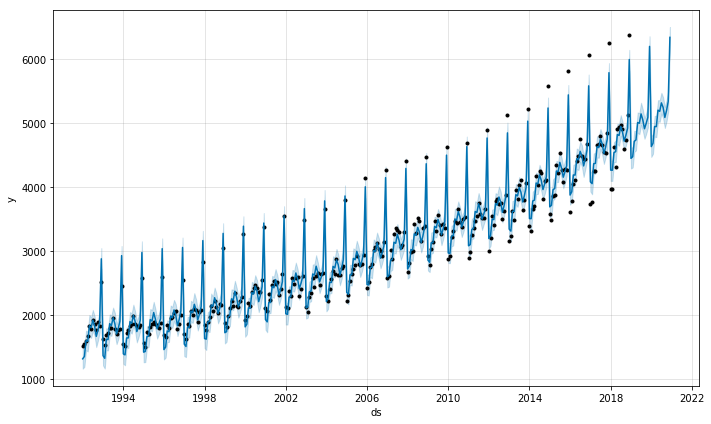

In [17]:
m.plot(forecast);

AttributeError: 'numpy.str_' object has no attribute 'toordinal'

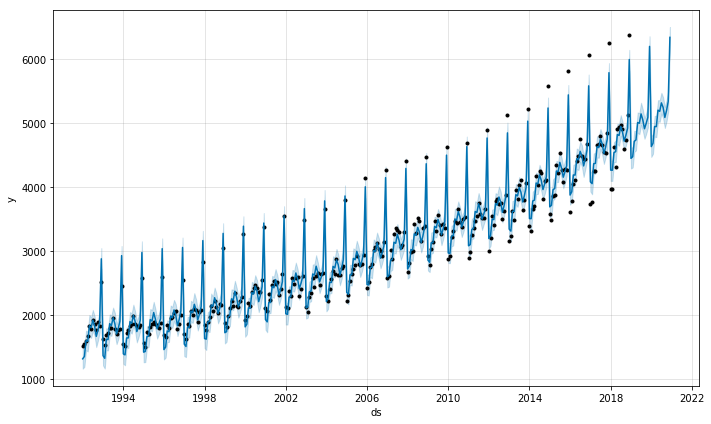

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01');

In [21]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 16 columns):
ds                            348 non-null datetime64[ns]
trend                         348 non-null float64
yhat_lower                    348 non-null float64
yhat_upper                    348 non-null float64
trend_lower                   348 non-null float64
trend_upper                   348 non-null float64
additive_terms                348 non-null float64
additive_terms_lower          348 non-null float64
additive_terms_upper          348 non-null float64
yearly                        348 non-null float64
yearly_lower                  348 non-null float64
yearly_upper                  348 non-null float64
multiplicative_terms          348 non-null float64
multiplicative_terms_lower    348 non-null float64
multiplicative_terms_upper    348 non-null float64
yhat                          348 non-null float64
dtypes: datetime64[ns](1), float64(15)
memory usage: 43.6 KB


TypeError: float() argument must be a string or a number, not 'Period'

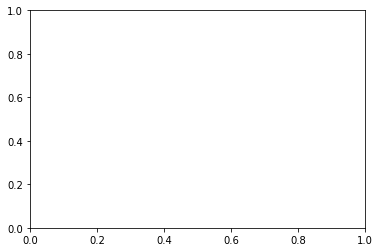

In [20]:
forecast.plot(x='ds',y='yhat')

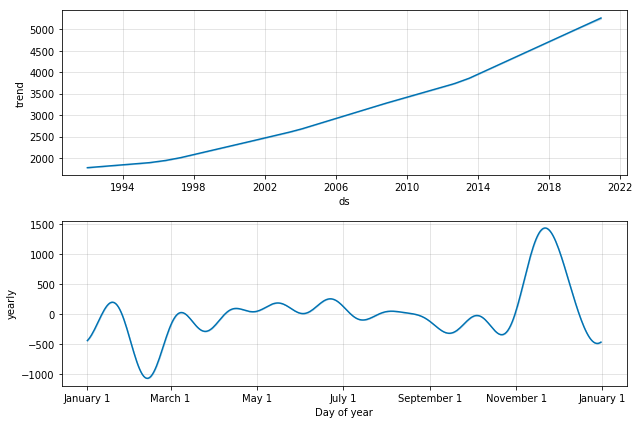

In [23]:
m.plot_components(forecast);


## Great Job!